## K-Means Clustering in Python

Source: http://stamfordresearch.com/k-means-clustering-in-python/ 

Source: https://www.youtube.com/watch?v=Lm1c2U8BmoA (PySpark, ML)

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#set Matplotlib inline plotting and load Pandas package
%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'

In [4]:
from pyspark import SparkContext, SparkConf, HiveContext, Row

hive_ctx = HiveContext(sc)
hive_ctx.setConf("hive.exec.dynamic.partition", "true")
hive_ctx.setConf("hive.exec.dynamic.partition.mode", "nonstrict")
hive_ctx.setConf("hive.exec.max.dynamic.partitions", "10000")
hive_ctx.sql("SET spark.sql.parquet.compression.codec=snappy") 

hive_ctx.sql("use prod_dxng_metrics")

DataFrame[result: string]

In [5]:
# Load data 

data = hive_ctx.sql("Select * from bi_temp_kmeanClusteringtable")

In [6]:
# Look at the first 5 results

df = data.toPandas()

df.head(5).transpose()

,0,1,2,3,4
s__uid,Bandizain,McGrane89,CauetPaul,Nimrodmk1,Shaunster
gameconnections,9,6,23,8,9
daysofconnections,8,3,12,5,6
firstsessionduration,46,156,4,53,4
totalplaytime,2,12.1,17.5,30.6,14.5
lastmap,1,2,6,6,5
secondarymissions,0,3,11,0,1
blackmarketfreq,7,5,253,191,39
legalfreq,14,12,25,440,79
blackmarketnb,2,1,6,6,1


In [7]:
# Number of features

len(df.columns)

42

### Summary Statistics

In [8]:
df.describe().transpose().tail(5)

,count,mean,std,min,25%,50%,75%,max
breachsessions,27675.0,1.883939,3.714855,1.0,1.000000,1.000000,2.000000,327.000000
breachsessionsdays,27675.0,1.483144,1.683328,1.0,1.000000,1.000000,1.000000,110.000000
infiltrationtime,19265.0,3.600675,15.487756,0.0,1.000000,1.000000,2.000000,1050.000000
dlc1sessions,4046.0,23.603806,24.799258,1.0,8.000000,17.000000,31.000000,357.000000
dlc1time,4046.0,8787.873111,6417.328702,0.0,4794.048769,8080.706909,11797.423492,60734.467377


### Replace Nas by mean of column for firstsessionduration


In [9]:
_ = df['firstsessionduration'].fillna(df['firstsessionduration'].mean(), inplace = True)

### Replace Nas by 0 for other columns

In [10]:
_ = df.fillna(0, inplace = True)

In [11]:
df.head(5).transpose()

,0,1,2,3,4
s__uid,Bandizain,McGrane89,CauetPaul,Nimrodmk1,Shaunster
gameconnections,9,6,23,8,9
daysofconnections,8,3,12,5,6
firstsessionduration,46,156,4,53,4
totalplaytime,2,12.1,17.5,30.6,14.5
lastmap,1,2,6,6,5
secondarymissions,0,3,11,0,1
blackmarketfreq,7,5,253,191,39
legalfreq,14,12,25,440,79
blackmarketnb,2,1,6,6,1


In [12]:
# Keep only 

cols = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')] # '|' = or 

len(cols)

41

In [13]:
df[cols].head(5).transpose()

,0,1,2,3,4
gameconnections,9.0,6.0,23.0,8.0,9.0
daysofconnections,8.0,3.0,12.0,5.0,6.0
firstsessionduration,46.0,156.0,4.0,53.0,4.0
totalplaytime,2.0,12.1,17.5,30.6,14.5
lastmap,1.0,2.0,6.0,6.0,5.0
secondarymissions,0.0,3.0,11.0,0.0,1.0
blackmarketfreq,7.0,5.0,253.0,191.0,39.0
legalfreq,14.0,12.0,25.0,440.0,79.0
blackmarketnb,2.0,1.0,6.0,6.0,1.0
legalnb,3.0,3.0,2.0,5.0,5.0


In [14]:
# New DataFrame without the s__uid 

df = df[cols]

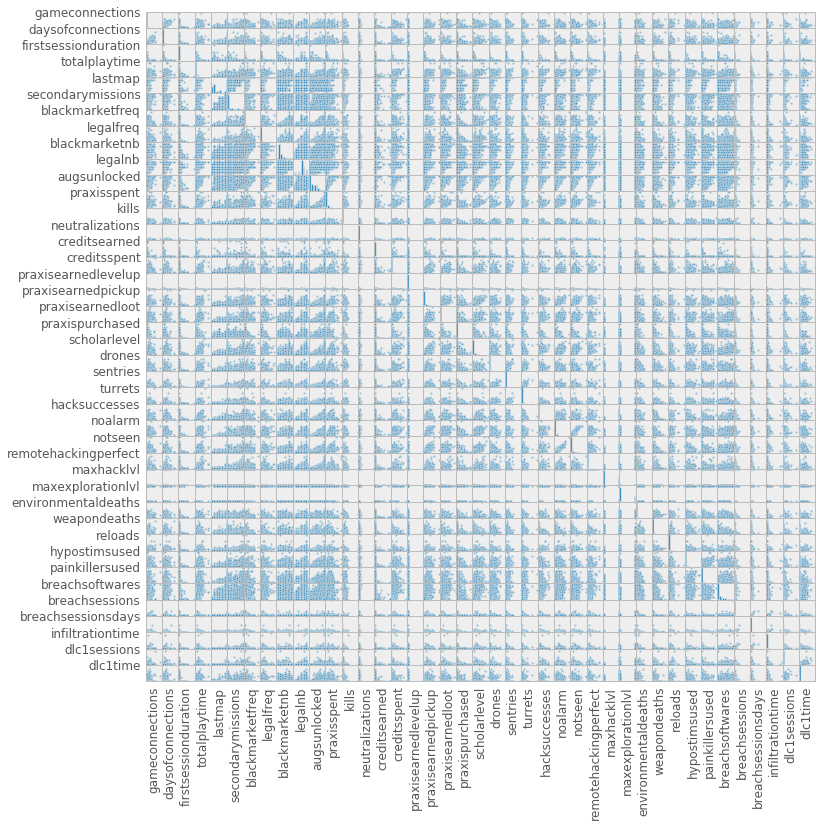

In [15]:
# Matrix of covariance

sampled_data = df[cols].sample(frac=0.1) 

axs = pd.scatter_matrix(sampled_data, figsize=(12, 12)); 

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

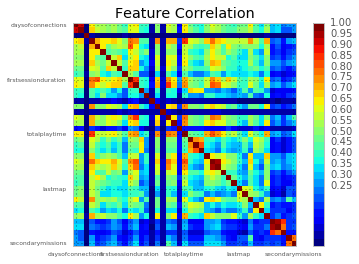

In [16]:
# Other type of visuzalization

# Source: http://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels= df.columns # not sure
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[.25,.3,.35,.4,.45,.5,.55,.6,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(sampled_data)

 ### Standardize Features
 
 source: http://stackoverflow.com/questions/12525722/normalize-data-in-pandas 
 
"In cluster analysis variables with large values contribute more to the distance calculations. Variables measured on different scales should be standardized prior to clustering, so that the solution is not driven by variables measured on larger scales." 

In [17]:
# standardize the data attributes

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)

df_normalized.head(5).transpose()

,0,1,2,3,4
0,0.022535,0.014085,0.061972,0.019718,0.022535
1,0.057377,0.016393,0.090164,0.032787,0.040984
2,0.004363,0.014795,0.000379,0.005027,0.000379
3,0.006053,0.036622,0.052966,0.092615,0.043886
4,0.166667,0.333333,1.000000,1.000000,0.833333
5,0.000000,0.214286,0.785714,0.000000,0.071429
6,0.001195,0.000853,0.043181,0.032599,0.006656
7,0.002334,0.002001,0.004168,0.073358,0.013171
8,0.200000,0.100000,0.600000,0.600000,0.100000
9,0.375000,0.375000,0.250000,0.625000,0.625000


In [18]:
# Set column names back

df_normalized.columns = cols

df_normalized.head().transpose()

,0,1,2,3,4
gameconnections,0.022535,0.014085,0.061972,0.019718,0.022535
daysofconnections,0.057377,0.016393,0.090164,0.032787,0.040984
firstsessionduration,0.004363,0.014795,0.000379,0.005027,0.000379
totalplaytime,0.006053,0.036622,0.052966,0.092615,0.043886
lastmap,0.166667,0.333333,1.000000,1.000000,0.833333
secondarymissions,0.000000,0.214286,0.785714,0.000000,0.071429
blackmarketfreq,0.001195,0.000853,0.043181,0.032599,0.006656
legalfreq,0.002334,0.002001,0.004168,0.073358,0.013171
blackmarketnb,0.200000,0.100000,0.600000,0.600000,0.100000
legalnb,0.375000,0.375000,0.250000,0.625000,0.625000


### Features Selection 

- RandomForrest
- Lasso
- PCA

## K-mean clustering using Spark ML 

In [ ]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

In [ ]:
df_normalized.dtypes

type(1)

In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

df_normalized = sqlContext.createDataFrame(df_normalized)

'''
vectorAssembler = VectorAssembler(inputCols= df_normalized.columns,
                                  outputCol="features")

df = vectorAssembler.transform(df_normalized)
'''

rdd = df_normalized.map(lambda data: Vectors.dense([float(c) for c in data]))

clusters = KMeans.train(rdd, 5, maxIterations=10, initializationMode="random") # 5 clusters

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer


class RowIterator(TransformerMixin):
    """ Prepare dataframe for DictVectorizer """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return (row for _, row in X.iterrows())


vectorizer = make_pipeline(RowIterator(), DictVectorizer())

In [ ]:
# Compute the sum of Squared Error:

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [ ]:
# Within-cluster sum of squares

WSSE = (rdd.map(lambda point: error(point))
                   .reduce(lambda x,y: x+y))

print("Within Set Sum of Squared Error = " + str(WSSE))

In [ ]:
# Try with a range of number of clusters

for l in range(1,6):
    clusters = KMeans.train(rdd, l, maxIterations = 100, runs = 100, initializationMode = 'random')
    WSSSE = (rdd.map(lambda point: error(point))
                .reduce(lambda x,y: x+y))
    print("With " + str(l) + ' clusters: Within Set Sum of Squared Error =' + str(WSSE))

## K-mean clustering using sklearn

### Sources

MasterClass: https://github.com/Marie-de-Leseleuc/Python-Code/blob/master/exo%2B1%20(2).ipynb 

1. https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials 

2. https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

3. http://mnemstudio.org/clustering-k-means-example-1.htm

4. https://www.dataquest.io/blog/k-means-clustering-us-senators/

### Method 1: K-mean

In [92]:
# Source: http://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering 

from sklearn.cluster import KMeans

dataset = df_normalized

# Convert DataFrame to matrix
mat = dataset.as_matrix()

# Using sklearn
km = KMeans(n_clusters=5)
km.fit(mat)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
 # results = pd.DataFrame([dataset.index,labels]).T # return a df with the cluster corresponding to each index

results = pd.DataFrame(data=labels, columns=['cluster'], index=dataset.index) # better way

In [93]:
results.head(5)

,cluster
0,0
1,1
2,1
3,4
4,4


In [94]:
# Add cluster number to each observation 

print(len(dataset), len(results))

dataset_f = dataset

dataset_f['cluster'] = results # Add cluster number to df

dataset_f['s__uid'] = data.toPandas()['s__uid'] # add s__uid to df

dataset_f[['cluster', 's__uid']].head(5) # produce cluster by player

(141105, 141105)


,cluster,s__uid
0,0,Bandizain
1,1,McGrane89
2,1,CauetPaul
3,4,Nimrodmk1
4,4,Shaunster


In [95]:
# Describe the clusters

label = dataset_f.cluster.unique()

for label in set(labels):
    print("Label:",label)
    print(dataset_f[dataset_f["cluster"]==label].describe())

('Label:', 0)
       gameconnections  daysofconnections  firstsessionduration  \
count     64496.000000       64496.000000          64496.000000   
mean          0.007361           0.013784              0.003775   
std           0.011526           0.019388              0.016379   
min           0.000000           0.000000              0.000000   
25%           0.000000           0.000000              0.001233   
50%           0.002817           0.008197              0.002750   
75%           0.011268           0.016393              0.003751   
max           0.811268           0.483607              1.000000   

       totalplaytime       lastmap  secondarymissions  blackmarketfreq  \
count   64496.000000  64496.000000       64496.000000     64496.000000   
mean        0.006183      0.135334           0.024227         0.001490   
std         0.008286      0.126127           0.059803         0.002230   
min         0.000000      0.000000           0.000000         0.000000   
25%         

In [ ]:
# Draw histograms

for label in set(labels):
    print("Label:",label)
    dataset_f[dataset_f["cluster"]==label].hist()

In [97]:
# Compare the cluster per variable

dataset_f.groupby('cluster').mean()

,gameconnections,daysofconnections,firstsessionduration,totalplaytime,lastmap,secondarymissions,blackmarketfreq,legalfreq,blackmarketnb,legalnb,...,weapondeaths,reloads,hypostimsused,painkillersused,breachsoftwares,breachsessions,breachsessionsdays,infiltrationtime,dlc1sessions,dlc1time
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.007361,0.013784,0.003775,0.006183,0.135334,0.024227,0.001490,0.002364,0.113950,0.304358,...,0.003752,0.003578,0.001324,0.000547,0.011017,0.000261,0.000658,0.000057,0.000019,0.000041
1,0.033995,0.060198,0.003625,0.045645,0.840186,0.345640,0.011584,0.018204,0.262298,0.451462,...,0.018488,0.026863,0.009721,0.007038,0.142413,0.001454,0.003453,0.000581,0.002207,0.004632
2,0.037642,0.067994,0.004418,0.053648,0.744775,0.362610,0.017388,0.019101,0.272114,0.473342,...,0.015627,0.027731,0.010891,0.008492,0.230892,0.001487,0.003613,0.000450,0.002221,0.005513
3,0.030513,0.056506,0.003591,0.039273,0.834282,0.263605,0.010206,0.015105,0.264457,0.464638,...,0.019452,0.020561,0.010045,0.007869,0.102067,0.001039,0.002669,0.000253,0.001173,0.002519
4,0.049851,0.084649,0.003655,0.074195,0.900230,0.500485,0.025654,0.030052,0.347516,0.486192,...,0.018443,0.044911,0.013608,0.010438,0.329101,0.002818,0.006252,0.001470,0.006328,0.013804


In [99]:
# Personal exercice: denormalize the data

dataset.drop('s__uid', axis=1, inplace=True)

dataset.drop('cluster', axis=1, inplace=True)

le = min_max_scaler.inverse_transform(dataset_f) # unscale the data

le = pd.DataFrame(le)

le.columns = cols

result = pd.DataFrame(data=labels, columns=['cluster'], index=le.index) 

dataset_f = le

dataset_f['cluster'] = result # Add cluster number to df

dataset_f['s__uid'] = data.toPandas()['s__uid'] # add s__uid to df

dataset_f[['cluster', 's__uid']].head(5) # produce cluster by player

dataset_f.groupby('cluster').mean()

,gameconnections,daysofconnections,firstsessionduration,totalplaytime,lastmap,secondarymissions,blackmarketfreq,legalfreq,blackmarketnb,legalnb,...,weapondeaths,reloads,hypostimsused,painkillersused,breachsoftwares,breachsessions,breachsessionsdays,infiltrationtime,dlc1sessions,dlc1time
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.613216,2.681670,39.806809,2.043006,0.812004,0.339184,8.730169,14.178042,1.139497,2.434864,...,6.379186,11.623372,2.101882,0.766792,0.330517,0.085215,0.072361,0.059353,0.006776,2.464147
1,13.068234,8.344200,38.217385,15.081256,5.041118,4.838960,67.871025,109.189538,2.622976,3.611693,...,31.429782,87.276948,15.427195,9.867458,4.272399,0.475360,0.379789,0.610400,0.787852,281.304587
2,14.362925,9.295315,46.585369,17.725339,4.468653,5.076537,101.874912,114.565654,2.721136,3.786739,...,26.565052,90.097001,17.284281,11.906310,6.926773,0.486207,0.397432,0.472866,0.793058,334.811082
3,11.832153,7.893733,37.860657,12.975658,5.005692,3.690463,59.794490,90.598789,2.644566,3.717106,...,33.067575,66.803391,15.941810,11.032698,3.062004,0.339873,0.293612,0.265880,0.418589,153.007465
4,18.696989,11.327233,38.534341,24.513909,5.401379,7.006787,150.309039,180.252906,3.475164,3.889539,...,31.353548,145.914447,21.595914,14.634286,9.873042,0.921341,0.687748,1.543102,2.259007,838.367781


In [100]:
dataset_f.cluster.value_counts()

0    64496
4    27702
1    22423
3    16515
2     9969
Name: cluster, dtype: int64

### Method 2: K-mean ++

In [ ]:
dataset.drop('s__uid', axis=1, inplace=True)

dataset.drop('cluster', axis=1, inplace=True)

In [72]:
# Source: http://stackoverflow.com/questions/34958994/how-to-use-scikit-kmeans-when-i-have-a-dataframe

import sklearn
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

sample_df_train, sample_df_test = sklearn.cross_validation.train_test_split(dataset, train_size=0.6)

cluster = sklearn.cluster.KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                                 precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

cluster.fit(sample_df_train)

result = cluster.predict(sample_df_train)

results = cluster.predict(sample_df_test)

In [143]:
# Not sure it works....

labels = cluster.labels_

result = pd.DataFrame([sample_df_train.index,labels]).T 

result.head(5)

,0,1
0,123957,3
1,95929,0
2,20139,2
3,45715,0
4,139279,2


In [127]:
# Merge the dataframe and the cluster analysis result

# Create a unique identifier using the index
sample_df_train.reset_index(level=0, inplace=True) 

# create a list with the index for each observation
cluslist=list(sample_df_train['index'])   

# create a lit with the cluster label for each observation
labels=list(cluster.labels_)

# create a dictionnary with the two lists
newlist=dict(zip(cluslist, labels))

# create a dataframe from the dictionnary 
newclus= pd.DataFrame.from_dict(newlist, orient='index')

# create a column with the cluster labels
newclus.columns = ['cluster']

# Create a unique identifier using the index
newclus.reset_index(level=0, inplace=True)

# merge the dataframes
merged_train=pd.merge(sample_df_train, newclus, on='index')

merged_train.head(n=5)

,level_0,index,gameconnections,daysofconnections,firstsessionduration,totalplaytime,lastmap,secondarymissions,blackmarketfreq,legalfreq,...,reloads,hypostimsused,painkillersused,breachsoftwares,breachsessions,breachsessionsdays,infiltrationtime,dlc1sessions,dlc1time,cluster
0,0,110924,0.002817,0.008197,0.003751,0.026634,0.833333,0.000000,0.000853,0.025509,...,0.003078,0.006301,0.003566,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2
1,1,116565,0.011268,0.016393,0.000000,0.026332,1.000000,0.000000,0.006998,0.008503,...,0.007695,0.009452,0.000713,0.000000,0.003058,0.009091,0.000952,0.0,0.0,3
2,2,138711,0.019718,0.032787,0.001897,0.061743,1.000000,0.357143,0.015020,0.006669,...,0.015389,0.010082,0.030670,0.500000,0.000000,0.000000,0.000000,0.0,0.0,1
3,3,58078,0.014085,0.024590,0.001043,0.038438,1.000000,0.642857,0.006315,0.002501,...,0.029855,0.002520,0.010699,0.300000,0.003058,0.009091,0.000000,0.0,0.0,2
4,4,15645,0.005634,0.016393,0.002656,0.049637,0.833333,0.000000,0.023895,0.026676,...,0.013850,0.015753,0.001427,0.233333,0.000000,0.000000,0.000000,0.0,0.0,4


('Label:', 0.0)
            level_0          index  gameconnections  daysofconnections  \
count  38814.000000   38814.000000     38814.000000       38814.000000   
mean   42219.748416   71301.280878         0.007391           0.013848   
std    24413.502210   40943.102277         0.011415           0.019553   
min        5.000000       5.000000         0.000000           0.000000   
25%    21060.250000   35447.250000         0.000000           0.000000   
50%    42116.500000   72319.500000         0.002817           0.008197   
75%    63284.750000  106964.750000         0.011268           0.016393   
max    84662.000000  141102.000000         0.611268           0.483607   

       firstsessionduration  totalplaytime       lastmap  secondarymissions  \
count          38814.000000   38814.000000  38814.000000       38814.000000   
mean               0.003800       0.006219      0.135690           0.024420   
std                0.017378       0.008333      0.126454           0.060134   
m

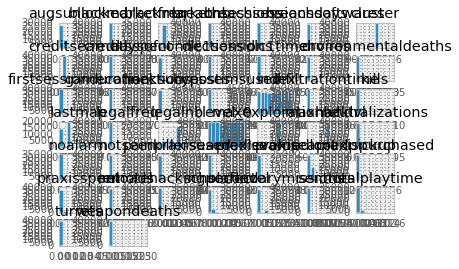

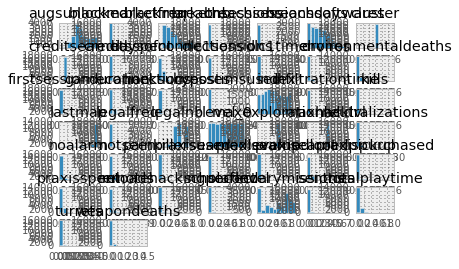

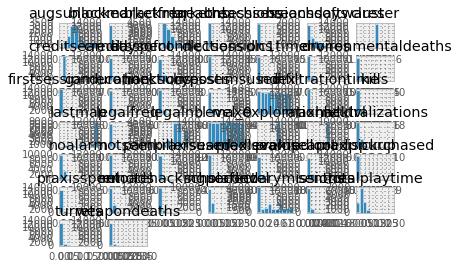

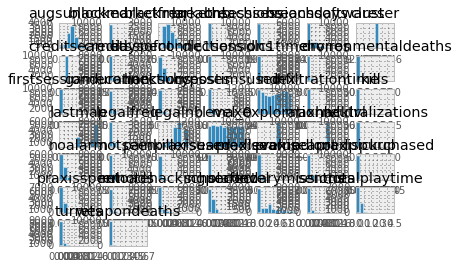

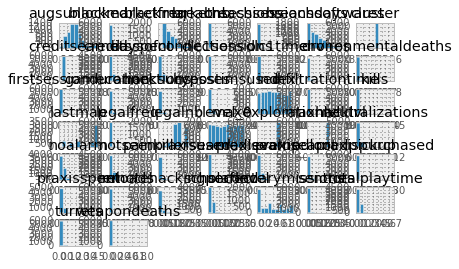

In [131]:
# Describe the clusters

Listlabels = merged_train.cluster.unique()

labels = [x for x in labels if str(x) != 'nan'] # get rid of Nan

for label in set(labels):
    print("Label:",label)
    print(merged_train[merged_train["cluster"]==label].describe())

In [132]:
merged_train.cluster.unique()

array([2, 3, 1, 4, 0])

In [147]:
# Compare clusters per variable

merged_train.groupby('cluster').mean()

,level_0,index,gameconnections,daysofconnections,firstsessionduration,totalplaytime,lastmap,secondarymissions,blackmarketfreq,legalfreq,...,weapondeaths,reloads,hypostimsused,painkillersused,breachsoftwares,breachsessions,breachsessionsdays,infiltrationtime,dlc1sessions,dlc1time
cluster,,,,,,,,,,,,,,,,,,,,,
0,42219.748416,71301.280878,0.007391,0.013848,0.003800,0.006219,0.135690,0.024420,0.001496,0.002378,...,0.003756,0.003595,0.001336,0.000550,0.011200,0.000258,0.000649,0.000053,0.000018,0.000041
1,42461.146185,69233.391187,0.049956,0.084799,0.003584,0.074022,0.901153,0.503435,0.025675,0.030203,...,0.018428,0.045154,0.013459,0.010221,0.328863,0.002771,0.006181,0.001433,0.006518,0.014196
2,42517.910456,69693.816229,0.034144,0.060524,0.003611,0.045855,0.842895,0.348289,0.011727,0.018243,...,0.018534,0.027006,0.009712,0.007080,0.143422,0.001488,0.003480,0.000616,0.002280,0.004623
3,42188.672540,70833.115910,0.030802,0.056851,0.003541,0.039269,0.837289,0.264507,0.010194,0.015127,...,0.019487,0.020715,0.009993,0.007816,0.101382,0.001073,0.002749,0.000269,0.001343,0.002887
4,42505.478790,70002.515633,0.037401,0.067972,0.004411,0.053323,0.739339,0.359823,0.017096,0.018874,...,0.015722,0.027688,0.010847,0.008646,0.230246,0.001466,0.003594,0.000436,0.002159,0.005487


('Label:', 0)


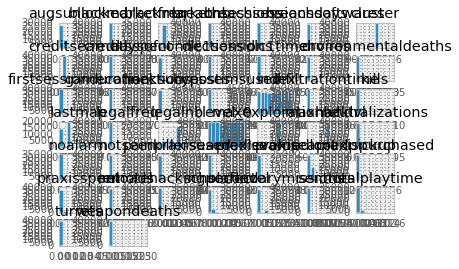

In [136]:
# Histograms

labels = range(0,1) # keep only the first 

for label in set(labels):
    print("Label:",label)
    merged_train[merged_train["cluster"]==label].hist()

### Method 3: K-mean + PCA

In [29]:
dataset.drop('s__uid', axis=1, inplace=True)

dataset.drop('cluster', axis=1, inplace=True)

In [102]:
#Source: 
#https://www.coursera.org/learn/machine-learning-data-analysis/lecture/Ebb2M/running-a-k-means-cluster-analysis-in-python-pt-1

import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# split data into train and test sets
clus_train, clus_test = train_test_split(dataset, test_size=.3, random_state=123)

# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[] #store distance values from the cluster centroids

for k in clusters:
    model=KMeans(n_clusters=k)  # specify number of clusters to use for the analysis
    model.fit(clus_train)  # cluster analysis
    clusassign=model.predict(clus_train) # assign cluster number to each observation based on the cluster analysis 
                                           # (i.e. assigned to closer cluster)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) # computes the average of 
                                            # the sum of the distances between each observation and a cluster centroids
    / clus_train.shape[0]) # divide the sum of distances by the nb of observation in the data set

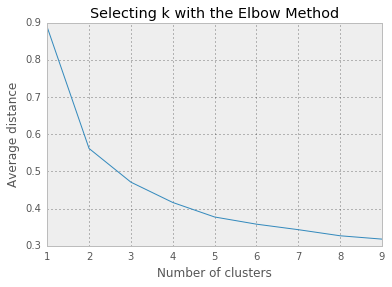

In [103]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist) # cluster 1 to 9 vs. avg distance that has just been calculated
plt.xlabel('Number of clusters') 
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

This graph shows the decrease in the avg minimun distance of the observations from the cluster centroids for each of the cluster solutions.

We can see that the avg distance decreases as the number of clusters increases. Since the goal of cluster analysis is to minimize the distance between observations and their assinged clusters, you want to chose the fewest amount of clusters that provide the low avg distance.

What we're looking for in this plot is a bend in the elbow that kind of shows where the average distance value might be leveling off such that adding more clusters doesn't decrease the average distance as much. 

Very subjective. Need to further examine the cluster solutions to see whether they do not overlap, wheter the patterns of means on the clustering variables are unique and meaningful and wether there are signifiant differences between the clusters on the external validation variable. 

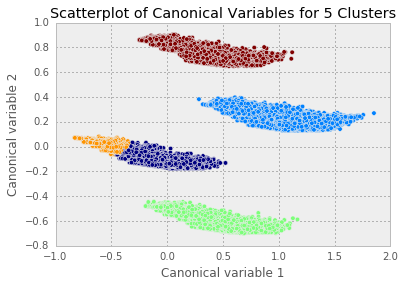

In [104]:
# Interpret 5 cluster solution (rerun the cluster analysis, this time asking for 5 clusters)
model3=KMeans(n_clusters=5) # create object 3 which contains the result from the culster analaysis with 5 clusters
model3.fit(clus_train)      # fit the model
clusassign=model3.predict(clus_train)  # create an object that has the cluster assignment based on the 5 clusters model

# plot clusters (try to see if the clusters overlap with each other in the p-dimension space)

# 42 variables i.e. 42 dimensions, which would be impossible to vizualise. So will use canonical discriminant analysis 
# which is a data reduction technique that creates a smaller number of variables that are linear combinaison of 
# the 42 clustering variables.

# Canonical variables are ordered by proportion of variance accounted for.
# Majority of variance is accounted (i.e.accounts for as much of the variability in the data as possible) by first few 
# canonical variables and those are the ones that we can plot. 
# variability: dispersion: the extent to which a distribution is stretched or squeezed.

from sklearn.decomposition import PCA 
pca_2 = PCA(2) # returns the two first canonical variable

plot_columns = pca_2.fit_transform(clus_train) 
    # create a matrix that include the 2 canonical var. estimated by the PCA
    
    # PCA_2.fit asks Python to fit the canonical discriminate analysis that we specified with the PCA command,
    # and the _transform applies the canonical discriminate analysis to the clus_train data set to calculate 
    # the canonical variables
    
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) # plot first and second canonical variables 
                                                                         # (first column & second column from plot_column)
        #  c=model3.labels_ tells python to color code the points for each of the clusters
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 5 Clusters')
plt.show()

# .transform() explaination: http://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object


A canonical variate is a new variable (variate) formed by making a linear combination of two or more variates (variables) from a data set.

3 clusters with a good separation. Possible correlation between two others. 4 clusters better?

In [105]:
"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# Let's look at the pattern of means on the clustering variables for each cluster to see whether they are distinct and meaningful
# To do this, we have to link the cluster assigment variables back to its corresponding observation in the clus_train dataset.

# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True) # use the index to create a new variable labeled index 
                                              # that we can use as a unique identifier.
  
    # level=0 tells Python to only remove the given levels from the index
    # inplace=True, tells Python to add the new column to the existing clus_train dataset.

# create a list that has the new index variable
cluslist=list(clus_train['index'])   

# create a list of cluster assignments 
labels=list(model3.labels_)

    # This will be combined with the cluster assignment variable,
    # so that we can merge the two datasets together by each observation's unique identifier.

In [106]:
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist

{0: 3,
 1: 2,
 3: 1,
 4: 1,
 7: 0,
 8: 1,
 11: 3,
 12: 3,
 13: 0,
 14: 3,
 15: 2,
 17: 4,
 18: 2,
 19: 3,
 20: 2,
 24: 1,
 25: 3,
 26: 3,
 27: 3,
 30: 1,
 31: 2,
 33: 3,
 34: 3,
 36: 4,
 37: 2,
 38: 1,
 39: 2,
 40: 3,
 41: 3,
 42: 3,
 44: 3,
 45: 3,
 46: 0,
 47: 1,
 49: 3,
 50: 2,
 53: 3,
 55: 3,
 57: 3,
 58: 3,
 59: 3,
 60: 2,
 61: 1,
 63: 0,
 64: 3,
 65: 1,
 66: 1,
 67: 2,
 69: 3,
 70: 3,
 71: 1,
 72: 2,
 74: 0,
 75: 2,
 76: 3,
 77: 2,
 78: 3,
 79: 3,
 80: 1,
 82: 3,
 83: 2,
 84: 1,
 85: 4,
 87: 3,
 88: 3,
 89: 3,
 90: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 0,
 97: 4,
 98: 0,
 99: 3,
 100: 3,
 101: 3,
 102: 3,
 103: 3,
 105: 3,
 106: 3,
 107: 3,
 108: 3,
 110: 3,
 111: 3,
 113: 3,
 114: 3,
 115: 3,
 116: 1,
 118: 1,
 119: 3,
 120: 3,
 121: 3,
 122: 3,
 123: 1,
 124: 2,
 125: 3,
 126: 3,
 128: 3,
 129: 3,
 130: 3,
 132: 2,
 133: 1,
 134: 0,
 136: 3,
 137: 3,
 138: 3,
 139: 2,
 140: 1,
 141: 0,
 143: 3,
 144: 1,
 145: 3,
 146: 3,
 147: 3,
 148: 3,
 150: 2,
 151: 2,
 152: 3,
 155: 4,
 156: 3,


In [107]:
# Select specific rows  
interesting_keys = range(0,6)
subdict = {x: newlist[x] for x in interesting_keys if x in newlist}
subdict

{0: 3, 1: 2, 3: 1, 4: 1}

In [108]:
# convert newlist dictionary to a dataframe
newclus= pd.DataFrame.from_dict(newlist, orient='index')
newclus.head(5)

,0
0,3
1,2
3,1
4,1
7,0


In [109]:
# rename the cluster assignment column
newclus.columns = ['cluster']

In [110]:
newclus.head(5)

,cluster
0,3
1,2
3,1
4,1
7,0


In [111]:
# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data

newclus.reset_index(level=0, inplace=True)

# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable

merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)

,index,gameconnections,daysofconnections,firstsessionduration,totalplaytime,lastmap,secondarymissions,blackmarketfreq,legalfreq,blackmarketnb,...,reloads,hypostimsused,painkillersused,breachsoftwares,breachsessions,breachsessionsdays,infiltrationtime,dlc1sessions,dlc1time,cluster
0,79843,0.005634,0.016393,0.003888,0.029964,1.000000,0.071429,0.006486,0.001167,0.5,...,0.010157,0.005041,0.000713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,73858,0.039437,0.049180,0.000190,0.004843,0.166667,0.000000,0.001707,0.002167,0.1,...,0.024315,0.003151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
2,111721,0.000000,0.000000,0.003751,0.000000,0.000000,0.000000,0.000171,0.000167,0.1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,87278,0.000000,0.000000,0.001328,0.000000,0.000000,0.000000,0.000171,0.000000,0.1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,33747,0.025352,0.073770,0.000379,0.008777,0.166667,0.000000,0.002731,0.000167,0.2,...,0.003078,0.003151,0.000713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
5,138513,0.000000,0.000000,0.003751,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
6,124525,0.005634,0.008197,0.000379,0.000605,0.000000,0.000000,0.000853,0.000167,0.1,...,0.000308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
7,15702,0.000000,0.000000,0.000285,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
8,18823,0.000000,0.000000,0.000759,0.000000,0.000000,0.000000,0.000341,0.000167,0.1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
9,14897,0.019718,0.032787,0.001517,0.036622,0.500000,0.214286,0.002048,0.013338,0.2,...,0.011388,0.010082,0.019258,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,2


In [112]:
# cluster frequencies
merged_train.cluster.value_counts()

3    45093
1    19420
2    15702
0    11527
4     7031
Name: cluster, dtype: int64

In [ ]:
"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

In [113]:
# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
                index  gameconnections  daysofconnections  \
cluster                                                     
0        71359.452850         0.030688           0.056818   
1        69445.976468         0.049593           0.084041   
2        70000.517323         0.033846           0.060032   
3        71394.782583         0.007387           0.013866   
4        69294.695349         0.037857           0.068316   

         firstsessionduration  totalplaytime   lastmap  secondarymissions  \
cluster                                                                     
0                    0.003591       0.039239  0.835343           0.266034   
1                    0.003696       0.073988  0.900807           0.501784   
2                    0.003653       0.045450  0.836910           0.343919   
3                    0.003806       0.006247  0.135793           0.024454   
4                    0.004254       0.053682  0.746219           0.362710

In [ ]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=data_clean['GPA1']
# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

### Method 4: Masterclass

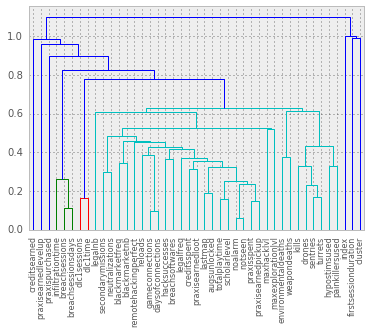

In [115]:
# Source: http://stackoverflow.com/questions/34175462/dendrogram-using-pandas-and-scipy

from scipy.cluster import hierarchy as hc

dataframe = merged_train
corr = 1 - dataframe.corr() 

corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns)
plt.show()

Source: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

- horizontal lines are cluster merges
- vertical lines tell you which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster


In [ ]:
# Hierarchical Clustering (see Benjamin's document)

# Note: too much data? Seem to return an overflowing error

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(merged_train.as_matrix(), 'ward') 

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()